   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

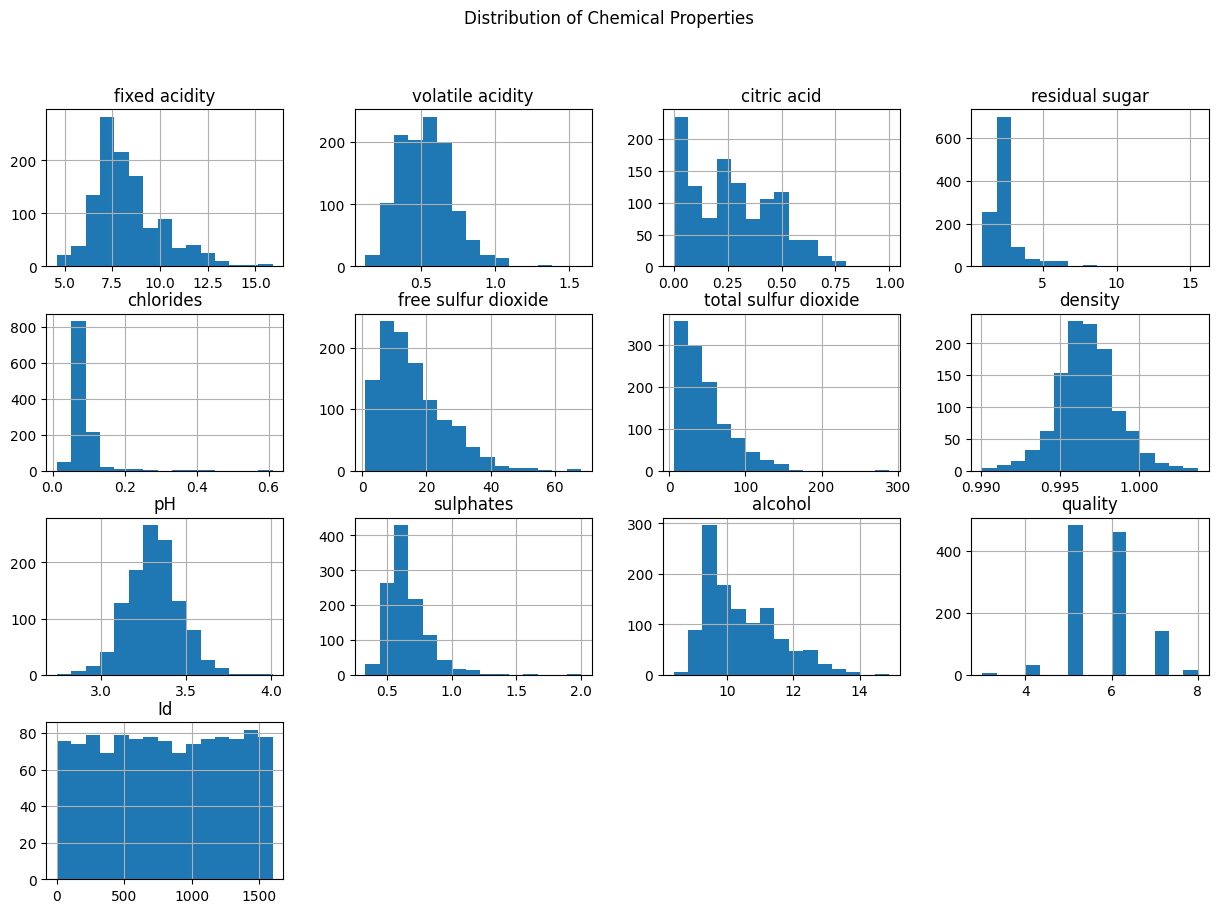

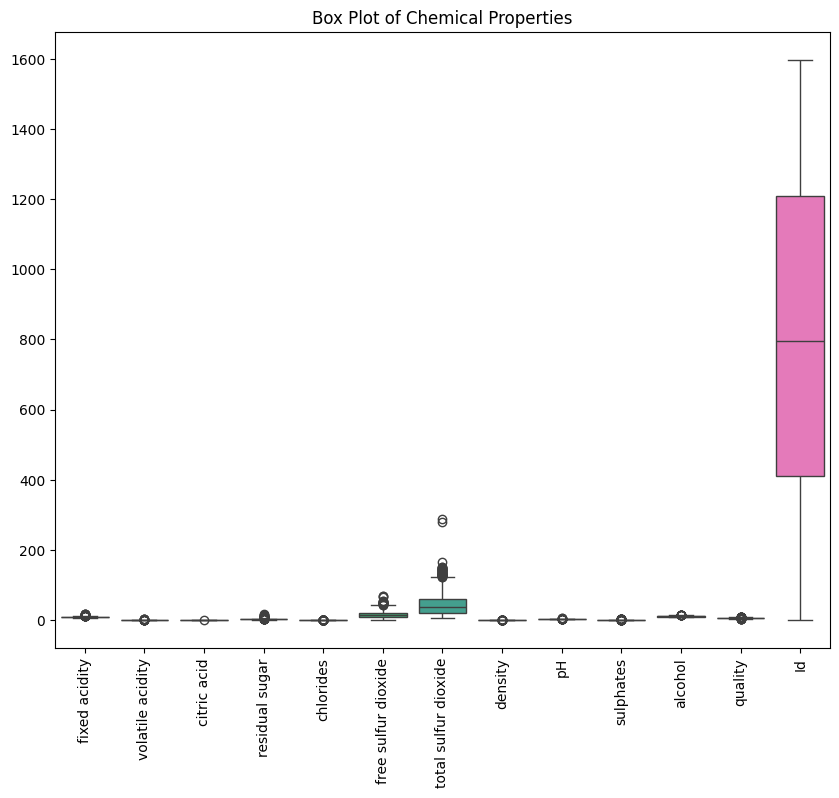

Mean Squared Error: 0.3876614008647904
R2 Score: 0.3332557138421478
PCA - Explained Variance by Component:
 [9.94585047e-01 5.14061004e-03 2.47979509e-04 1.36386299e-05
 7.54663260e-06]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('WineQT.csv')  # Replace with your file path

# Data overview
print(data.head())
print(data.info())

# Data visualization: Histograms and box plots
data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Chemical Properties')
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.title('Box Plot of Chemical Properties')
plt.xticks(rotation=90)
plt.show()

# Splitting data
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Multiple Regression Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Perform PCA for variance explanation
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Results
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("PCA - Explained Variance by Component:\n", pca.explained_variance_ratio_)